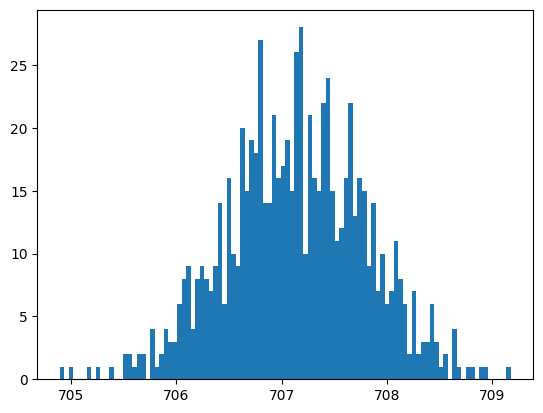

In [1]:
import matplotlib.pyplot as plt
import numpy as np

noise = np.random.default_rng(seed=0).normal(loc=0.0, scale=1.0, size=(500_000, 768))
noise_norm = np.linalg.norm(noise, axis=0)

plt.hist(noise_norm, bins=100);

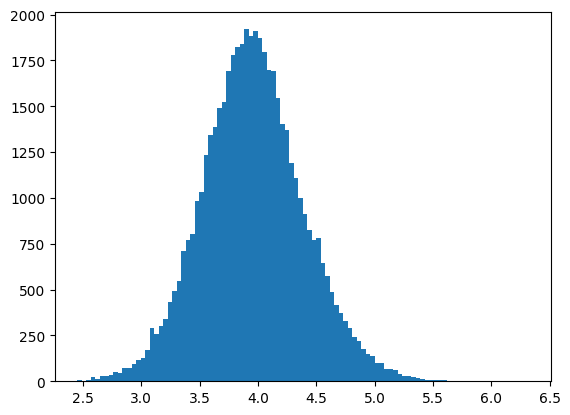

In [9]:
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("gpt2")
embedding_weights = model.get_input_embeddings().weight.detach()
embedding_norm = np.linalg.norm(embedding_weights.numpy(), axis=1)

plt.hist(embedding_norm, bins=100);

In [10]:
embedding_weights.shape

torch.Size([50257, 768])

In [11]:
type(embedding_weights)

torch.Tensor

In [12]:
gpu_embedding_weights = embedding_weights.to("cuda")
type(gpu_embedding_weights)

torch.Tensor

In [14]:
gpu_embedding_weights.dtype

torch.float32

In [19]:
import torch

torch.max(gpu_embedding_weights), torch.min(gpu_embedding_weights)

(tensor(1.7852, device='cuda:0'), tensor(-1.2698, device='cuda:0'))

In [20]:
gpu_embedding_weights.to(torch.half)

tensor([[-0.1101, -0.0393,  0.0331,  ..., -0.1364,  0.0151,  0.0453],
        [ 0.0403, -0.0486,  0.0462,  ...,  0.0861,  0.0025,  0.0432],
        [-0.1274,  0.0479,  0.1841,  ...,  0.0899, -0.1298, -0.0878],
        ...,
        [-0.0445, -0.0548,  0.0123,  ...,  0.1044,  0.0978, -0.0695],
        [ 0.1860,  0.0167,  0.0461,  ..., -0.0963,  0.0785, -0.0225],
        [ 0.0514, -0.0277,  0.0499,  ...,  0.0070,  0.1552,  0.1207]],
       device='cuda:0', dtype=torch.float16)

In [21]:
embeding_pair_similarities = torch.matmul(gpu_embedding_weights, gpu_embedding_weights.T)
print(embeding_pair_similarities.shape)
mean_similarities = np.mean(embeding_pair_similarities, axis=1)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>                                                                                      │
│                                                                                                  │
│ ❱ 1 embeding_pair_similarities = torch.matmul(gpu_embedding_weights, gpu_embedding_weights.T     │
│   2 print(embeding_pair_similarities.shape)                                                      │
│   3 mean_similarities = np.mean(embeding_pair_similarities, axis=1)                              │
│   4                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
OutOfMemoryError: CUDA out of memory. Tried to allocate 9.41 GiB (GPU 0; 3.81 GiB total capacity; 369.62 MiB 
already allocated; 3.23 GiB free; 446.00 MiB reserved in total by PyTorch) If reserved memory is >> allocated 
memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and 
PYTORCH_CUDA_ALLOC_CONF